# hw2


#### 1. Choose one of the following datasets or other datasets you like. Load the images into  Python, split the images into training, testing and validation set with a reasonable ratio.
Report: (1) the number of samples in the training, testing and validation set (2) the
number of categories (3) the size of the image (width, height, number of channels).
Fashion MNIST: an mnist-like dataset of fashion images
CIFAR-10: a collection of colored images of different classes.
Hint: The above two datasets can be loaded through keras.datasets.fashion_mnist
and keras.datasets.cifar10

In [3]:

!pip install  keras==2.1.6
import keras
keras.__version__
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 72s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
num_classes

10

__(1) The number of samples in the training, testing and validation set__ is 40000,10000,10000 after split.  
__(2) the number of categories:__10  
__(3) the size of the image (width, height, number of channels):__ width= 28, height = 28. number of channels = 3. 

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [9]:
x_train.shape

(40000, 32, 32, 3)

In [10]:
x_train[:1][0].shape


(32, 32, 3)

#### 2. Show 9 sample images from your training set.

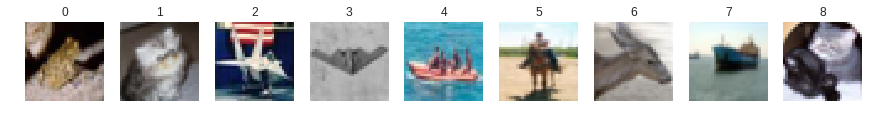

In [11]:
plt.figure(figsize=(15,1.5))

for i in range(9):
    plt.subplot(1,9,i+1)  

    plt.imshow(x_train[i])
    plt.title(i)
    plt.axis("off")
    


#### 3. Train a CNN with 2 convolutional layer and 1 fully-connected layer.
Report the structure of the CNN:
(1) filter size and filter number of each convolutional layer
(2) neuron number of the fully-connected layer
(3) optimization algorithm and its learning rate and training epochs.
Report the accuracy on the test set.

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:


batch_size = 32
num_classes = 10
epochs = 5

model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 30s 760us/step - loss: 1.5884 - acc: 0.4330 - val_loss: 1.3532 - val_acc: 0.5167
Epoch 2/5
40000/40000 [==============================] - 29s 716us/step - loss: 1.2481 - acc: 0.5617 - val_loss: 1.2618 - val_acc: 0.5514
Epoch 3/5
40000/40000 [==============================] - 29s 715us/step - loss: 1.0947 - acc: 0.6176 - val_loss: 1.1320 - val_acc: 0.6040
Epoch 4/5
40000/40000 [==============================] - 29s 715us/step - loss: 0.9818 - acc: 0.6599 - val_loss: 1.0869 - val_acc: 0.6240
Epoch 5/5
40000/40000 [==============================] - 29s 715us/step - loss: 0.8836 - acc: 0.6958 - val_loss: 1.0500 - val_acc: 0.6355


In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 230us/step
Test loss: 1.053884597015381
Test accuracy: 0.6321


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


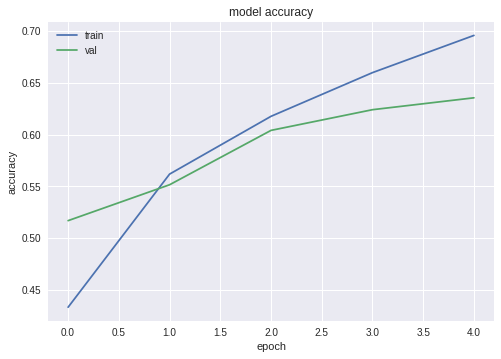

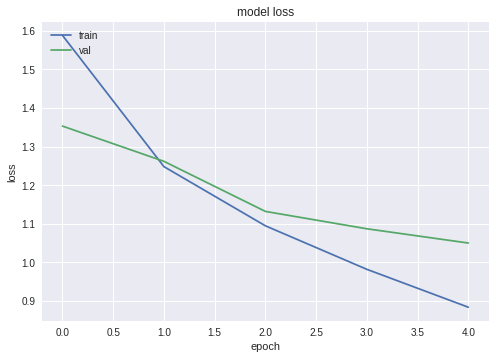

In [16]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

X_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples
5000 validation samples
learning rate: 1.0e-04
num_filter: 64
num_conv_layers: 1

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 101us/step - loss: 0.4745 - acc: 0.8859 - val_loss: 0.1712 - val_acc: 0.9560
Epoch 2/25
55000/55000 [==============================] - 5s 95us/step - loss: 0.1815 - acc: 0.9495 - val_loss: 0.1214 - val_acc: 0.9692
Epoch 3/25
55000/55000 [==============================] - 5s 95us/step - loss: 0.1250 - acc: 0.9652 - val_loss: 0.0913 - val_acc: 0.9746
Epoch 4/25
55000/55000 [==============================] - 5s 96us/step - loss: 0.0930 - acc: 0.9743 - val_loss: 0.0734 - val_acc: 0.9810
Epoch 5/25
55000/55000 [==============================] - 5s 96us/step - loss: 0.0732 - acc: 0.9801 - val_loss: 0.0692 - val_acc: 0.9838
Epoch 6/25
55000/55000 [==============================] - 5s 95us/step - loss: 0.0591 - acc: 0.9845 - val_loss

[(-0.995, [0.000910421894763718, 85, 4]),
 (-0.9934, [0.0006148084890887538, 71, 8]),
 (-0.9934, [0.0014950828049244893, 84, 5]),
 (-0.9932, [0.0002351105898625325, 69, 6]),
 (-0.9912, [0.0009865284410502128, 49, 3]),
 (-0.991, [0.0008813743757774097, 40, 9]),
 (-0.9888, [0.0034542489422488385, 48, 6]),
 (-0.9878, [0.00024609881921158755, 63, 10]),
 (-0.9864, [0.0001, 64, 1]),
 (-0.106, [0.00430027531675362, 96, 6]),
 (-0.106, [0.0069282073295663625, 42, 8])]

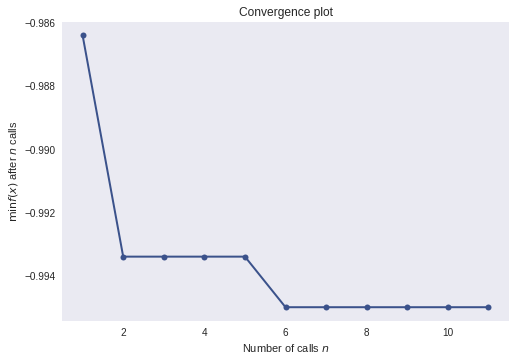

In [19]:

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.layers import InputLayer, Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.optimizers import Adam
import os


from skopt import gp_minimize, dump, load
from skopt.space import Real, Integer
from skopt.plots import plot_convergence
from skopt.utils import use_named_args


batch_size = 128
num_classes = 10
epochs = 25 # You can try more epochs
kernel_size=3
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# different backend saves data in diffferent format
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else: # for Tensorflow, the format is [N_image, image_row, image_col, channel]
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize the pixels to [0, 1]
X_train /= 255
X_test /= 255

# subset 5000 samples from X_train as validation_set
X_train, X_val = X_train[0:55000,:,:,:], X_train[-5000:,:,:,:]
y_train, y_val = y_train[0:55000], y_train[-5000:]

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validation samples')


# convert class vectors to one-hot class matrices
y_train_vec = y_train
y_test_vec = y_test
y_val_vec = y_val
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

def create_model(learning_rate, num_filter, num_conv_layers):
    # Start construction of a Keras Sequential model.
    model = Sequential()
    model.add(InputLayer(input_shape=(img_rows, img_cols, 1, )))
    model.add(Conv2D(32, kernel_size=int(kernel_size),
             input_shape=(img_rows, img_cols, 1, ),
             activation='relu',
             padding='same',
             name = 'layer_conv_0'))
    for i in range(1,num_conv_layers):
        # Name of the layer. This is not really necessary
        # because Keras should give them unique names.
        name = 'layer_conv_{0}'.format(i+1)
    
        # Add the dense / fully-connected layer to the model.
        # This has two hyper-parameters we want to optimize:
        # The number of nodes and the activation function.
        model.add(Conv2D(num_filter, kernel_size=int(kernel_size),
             input_shape=(img_rows, img_cols, 1, ),
             activation='relu',
             padding='same',
             name = name))
        model.add(MaxPooling2D(pool_size=2,padding='same', strides=2))
 
    model.add(Flatten())
    model.add(Dense(128,
                activation='relu',
                name="layer_dense_0"))
    model.add(Dense(64,
                    activation='relu',
                    name="layer_dense_1"))
    
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate),
              metrics=['accuracy'])    
    return model

def log_dir_name(learning_rate,
                 num_filter,
                 num_conv_layers):
    # The dir-name for the TensorBoard log-dir.
    s = os.path.join(log_path, "lr_{0:.0e}_kernel_{1}_dense_{2}/")
    
    log_dir = s.format(learning_rate,
                       num_filter,
                       num_conv_layers)
    return log_dir

dim_learning_rate = Real(low=1e-4, high=1e-2, prior='log-uniform',
                             name='learning_rate')
dim_num_filter = Integer(low=32, high=128, name='num_filter')
dim_num_conv_layers = Integer(low=1, high=10, name='num_conv_layers')

dimensions = [dim_learning_rate, dim_num_filter, dim_num_conv_layers]


log_path = './mnist_skopt_log'
if not os.path.exists(log_path):
    os.makedirs(log_path)
result_path = './mnist_skopt_result'
if not os.path.exists(result_path):
    os.makedirs(result_path)
path_best_model = os.path.join(result_path+'best_model.keras')
best_accuracy = 0.0

@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_filter, num_conv_layers):
    # Print the hyper-parameters.
    print('learning rate: {0:.1e}'.format(learning_rate))
    print('num_filter:', num_filter)
    print('num_conv_layers:', num_conv_layers)
    print()
    # Create the neural network with these hyper-parameters.
    model = create_model(learning_rate, num_filter,  num_conv_layers)
     
    # Dir-name for the TensorBoard log-files.
    log_dir = log_dir_name(learning_rate, num_filter,  num_conv_layers)
     
    # Create a callback-function for Keras which will be
    # run after each epoch has ended during training.
    # This saves the log-files for TensorBoard.
    # Note that there are complications when histogram_freq=1.
    # It might give strange errors and it also does not properly
    # support Keras data-generators for the validation-set.
    callback_log = TensorBoard(
        log_dir=log_dir,
        histogram_freq=0,
        batch_size=32,
        write_graph=True,
        write_grads=False,
        write_images=False)
    
    # Use Keras to train the model.
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val),
                        callbacks=[callback_log])
    # Get the classification accuracy on the validation-set
    # after the last training-epoch.
    accuracy = history.history['val_acc'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()
    
    # Save the model if it improves on the best-found performance.
    # We use the global keyword so we update the variable outside
    # of this function.
    global best_accuracy

    # If the classification accuracy of the saved model is improved ...
    if accuracy > best_accuracy:
        # Save the new model to harddisk.
        model.save(path_best_model)
        
        # Update the classification accuracy.
        best_accuracy = accuracy

    # Delete the Keras model with these hyper-parameters from memory.
    del model
    
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    K.clear_session()
    
    # NOTE: Scikit-optimize does minimization so it tries to
    # find a set of hyper-parameters with the LOWEST fitness-value.
    # Because we are interested in the HIGHEST classification
    # accuracy, we need to negate this number so it can be minimized.
    return -accuracy

# initial hyperparameters for search
default_parameters = [1e-4, 64, 1]

# search by Gaussian Process Optimization
search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=11, # min n_calls=11
                            x0=default_parameters)

# save the search result for future use
dump(search_result,result_path+'search_result.gz', compress=9)
# if you need to reload the optimization history, use the following command
#res_load = load(result_path+'search_result.gz')

# check the optimization result
plot_convergence(search_result)

# check the optimized solution
search_result.x

# Evaluate the performance of the best model on the test set
model_best = load_model(path_best_model)
score = model_best.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# check the optimization history by listing the combination of all x and 
# its corresponding funtion value
sorted(zip(search_result.func_vals, search_result.x_iters))

